✅ Data Loaded Successfully!

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

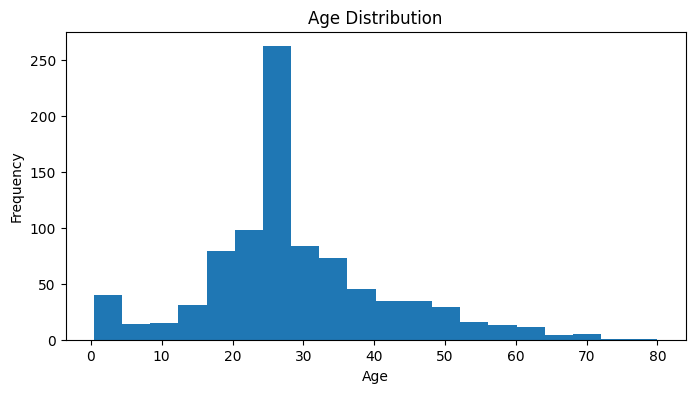

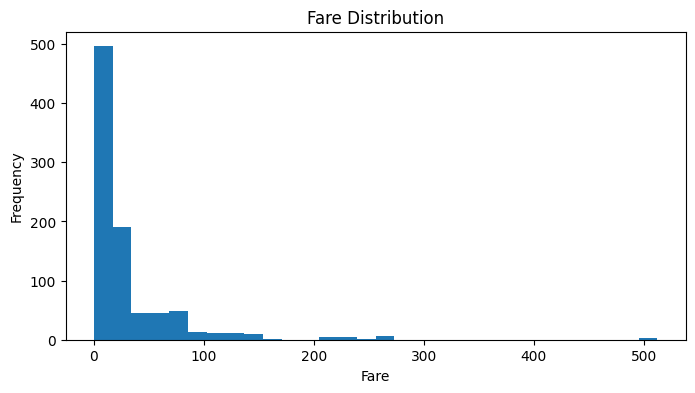

<Figure size 800x400 with 0 Axes>

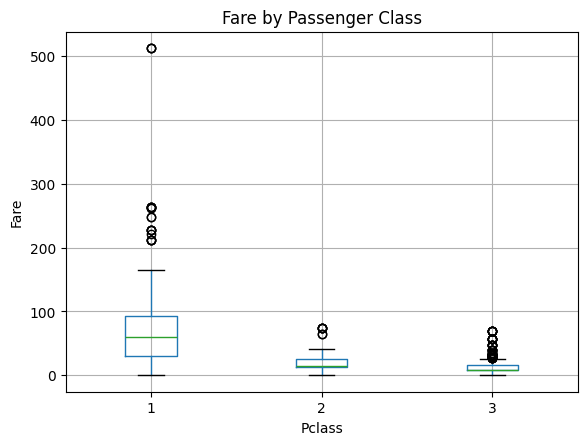

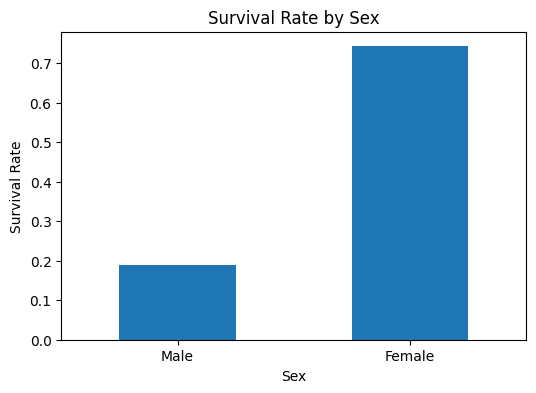

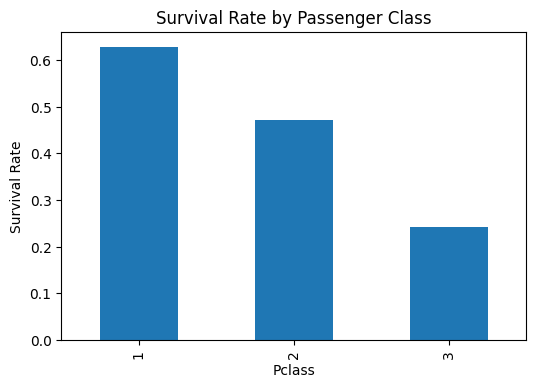

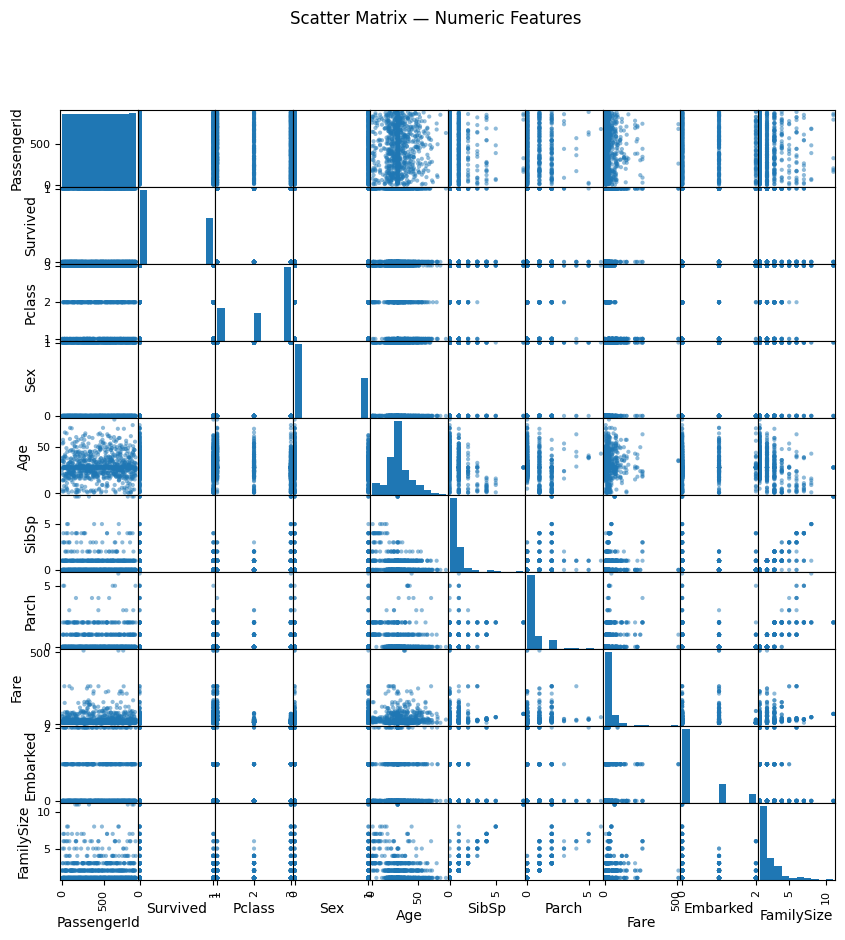

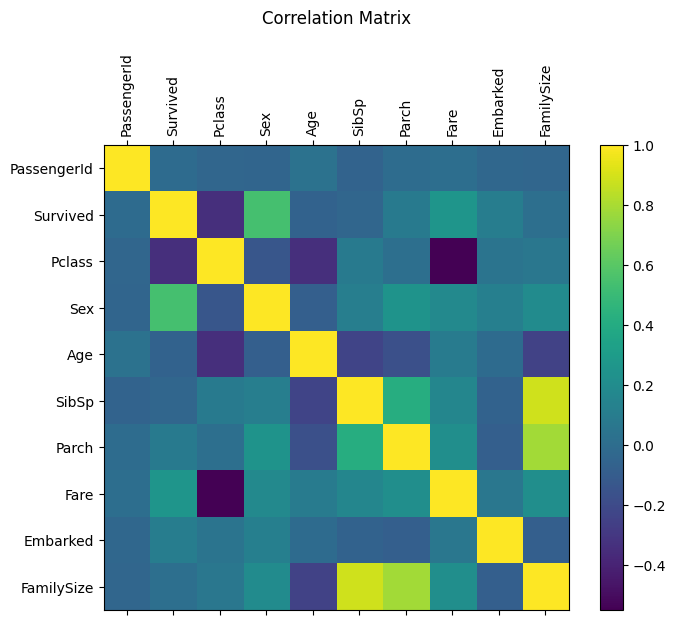


 Key Insights:
- Females and passengers in higher classes have higher survival rates.
- Fare is right-skewed with outliers (consider log transform for models).
- Age had missing values — filled with median.
- Created new features: FamilySize, Title, Deck.
- Data ready for visualization or predictive modeling.


In [1]:
# ------------------------------------------------------------
# Titanic EDA + Data Cleaning + Feature Engineering
# ------------------------------------------------------------

# 1️) Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# ------------------------------------------------------------
# 2️) Load Dataset
# ------------------------------------------------------------
df = pd.read_csv("train.csv")  # ensure train.csv is in the same folder
print("✅ Data Loaded Successfully!\n")
print(df.head())

# ------------------------------------------------------------
# 3️) Basic Info and Missing Values
# ------------------------------------------------------------
print("\n=== Basic Information ===")
df.info()

print("\n=== Summary Statistics ===")
print(df.describe(include='all'))

print("\n=== Missing Values ===")
print(df.isnull().sum())

# ------------------------------------------------------------
# 4️) Data Cleaning
# ------------------------------------------------------------

# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Extract Deck from Cabin (first letter)
df['Deck'] = df['Cabin'].apply(lambda x: str(x)[0] if pd.notnull(x) else 'M')  # 'M' = missing

# Drop Cabin column (too many missing)
df.drop(columns=['Cabin'], inplace=True)

# Check duplicates
df.drop_duplicates(inplace=True)

print("\n✅ Data Cleaning Completed!\n")
print(df.isnull().sum())

# ------------------------------------------------------------
# 5️) Feature Engineering
# ------------------------------------------------------------

# Extract Title from Name
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Create Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Encode Sex (male=0, female=1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Encode Embarked (S=0, C=1, Q=2)
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

print("\n✅ Feature Engineering Completed!\n")
print(df.head())

# ------------------------------------------------------------
# 6️) Save Cleaned Dataset
# ------------------------------------------------------------
df.to_csv("Titanic_Cleaned.csv", index=False)
print("\n Cleaned dataset saved as Titanic_Cleaned.csv")

# ------------------------------------------------------------
# 7️) Exploratory Data Analysis (EDA)
# ------------------------------------------------------------

# Histogram — Age
plt.figure(figsize=(8,4))
df['Age'].plot(kind='hist', bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

# Histogram — Fare
plt.figure(figsize=(8,4))
df['Fare'].plot(kind='hist', bins=30)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()

# Boxplot — Fare by Pclass
plt.figure(figsize=(8,4))
df.boxplot(column='Fare', by='Pclass')
plt.title('Fare by Passenger Class')
plt.suptitle('')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

# Bar Plot — Survival by Sex
plt.figure(figsize=(6,4))
df.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.xticks([0,1], ['Male','Female'], rotation=0)
plt.show()

# Bar Plot — Survival by Class
plt.figure(figsize=(6,4))
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Scatter Matrix (pairwise numeric features)
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
scatter_matrix(df[numeric_cols], figsize=(10,10), diagonal='hist')
plt.suptitle('Scatter Matrix — Numeric Features')
plt.show()

# Correlation Heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
plt.matshow(corr, fignum=1)
plt.title('Correlation Matrix', pad=20)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()

# ------------------------------------------------------------
# 8️) Key Observations
# ------------------------------------------------------------
print("\n Key Insights:")
print("- Females and passengers in higher classes have higher survival rates.")
print("- Fare is right-skewed with outliers (consider log transform for models).")
print("- Age had missing values — filled with median.")
print("- Created new features: FamilySize, Title, Deck.")
print("- Data ready for visualization or predictive modeling.")
